In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import urllib.request, json 
from scipy.optimize import curve_fit

from src.data_collection import *
from src.constants import *

In [3]:
def gompertz(x,a,b,c):
    return a*np.exp(-b*np.exp(-c*x))  

confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T

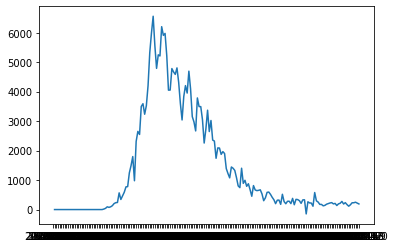

In [39]:
country = 'Italy'
t = confirm[country][:-65]
plt.plot(t.diff())

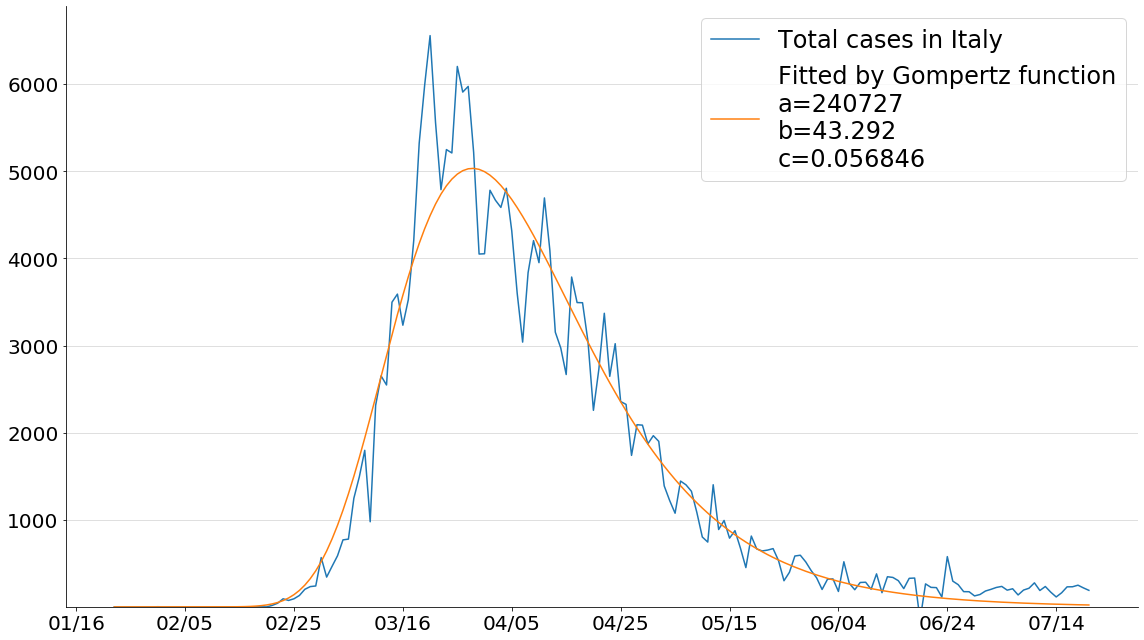

In [40]:
xdata = t.reset_index().index.tolist()
ydata = t.values

popt, pcov = curve_fit(gompertz, xdata, ydata)

k = pd.DataFrame(t)
k['fit'] = [gompertz(x, popt[0], popt[1], popt[2]) for x in xdata]
k.index = pd.to_datetime(k.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.plot(k[country].diff(), label='Total cases in %s'%country)
ax.plot(k['fit'].diff(), label='Fitted by Gompertz function\na=%s\nb=%s\nc=%s'%(int(popt[0]), np.round(popt[1], 3), np.round(popt[2], 6)))

ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=1)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# ax.set_yscale('log')
plt.tight_layout()
# plt.savefig('figures/Daily_misc_Gompertz_%s.png'%country, dpi=100)

In [6]:
df2 = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [14]:
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46057,NaN,NaN,International,2020-09-21,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46058,NaN,NaN,International,2020-09-22,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46059,NaN,NaN,International,2020-09-23,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46060,NaN,NaN,International,2020-09-24,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


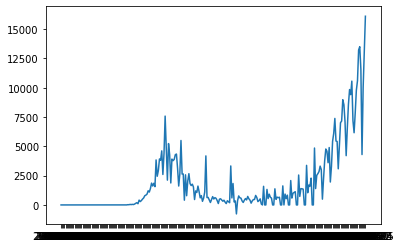

In [30]:
plt.plot(df2.set_index('date').query('location=="France"')['new_cases'])

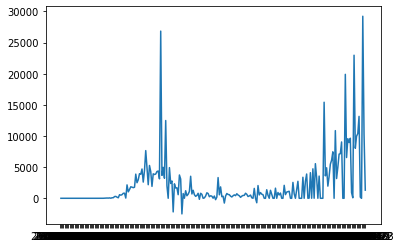

In [31]:
plt.plot(confirm['France'].diff())